In [4]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [5]:
data = pd.read_csv("data/train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
data = data.sample(frac=1).reset_index(drop=True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1123,20,RL,NaN,8926,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,3,1956,1956,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,672,672,GasA,Ex,Y,FuseA,960,0,0,960,0,0,1,0,3,1,TA,5,Typ,0,NaN,Basment,1956.0,Unf,1,288,TA,TA,Y,64,0,0,0,160,0,NaN,MnPrv,NaN,0,10,2009,COD,Abnorml,112000
1,912,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,NaN,Detchd,1978.0,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143500
2,848,20,RL,36.0,15523,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1972,1972,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,460,Unf,0,404,864,GasA,Ex,Y,SBrkr,864,0,0,864,1,0,1,0,3,1,TA,5,Typ,1,Fa,Attchd,1972.0,Unf,1,338,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,133500
3,611,60,RL,NaN,11050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,PosN,Norm,1Fam,2Story,9,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,204.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,904,Unf,0,536,1440,GasA,Ex,Y,SBrkr,1476,677,0,2153,1,0,2,1,3,1,Ex,8,Typ,2,Ex,Attchd,2000.0,Fin,3,736,TA,TA,Y,253,142,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,313000
4,151,20,RL,120.0,10356,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,716,Unf,0,253,969,GasA,TA,Y,SBrkr,969,0,0,969,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1975.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,717,70,RM,60.0,10800,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1890,1998,Gable,CompShg,Wd Sdng,VinylSd,None,0.0,TA,Gd,BrkTil,TA,TA,No,Unf,0,Unf,0,718,718,GasA,Ex,Y,SBrkr,1576,978,0,2554,0,0,1,1,3,1,TA,8,Typ,0,NaN,Detchd,1996.0,Unf,2,704,TA,TA,P,0,48,143,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,159500
1456,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1457,649,60,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,2Story,6,5,1966,1966,Gable,CompShg,MetalSd,MetalSd,BrkFace,351.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,756,756,GasA,TA,Y,SBrkr,1051,788,0,1839,0,0,1,1,4,1,TA,7,Typ,1,TA,Attchd,1966.0,Unf,2,442,TA,TA,Y,0,124,216,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,155000
1458,819,80,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,SLvl,6,7,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,80.0,TA,TA,CBlock,TA,TA,Av,GLQ,504,Unf,0,506,10

In [15]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
print(data['Alley'].isna().sum())
print(data['FireplaceQu'].isna().sum())
print(data['PoolQC'].isna().sum())
print(data['Fence'].isna().sum())
print(data['MiscFeature'].isna().sum())

1369
690
1453
1179
1406


In [18]:
data.shape

(1460, 81)

In [ ]:
#data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace=True)

#data.drop(['LotFrontage'], axis=1, inplace=True)

In [19]:
data.drop(['Id'], axis=1, inplace=True)
data.shape

(1460, 80)

In [21]:
# Imputing Missing Values
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Columns of dtype object are imputed with the most frequent value in column. 
        Columns of other types are imputed with mean of column."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in 
            X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
X = pd.DataFrame(data) 
    
data = DataFrameImputer().fit_transform(X)
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [22]:
LE = LabelEncoder()
CateList = data.select_dtypes(include="object").columns
print(CateList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [23]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,70.049958,8926,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,3,1956,1956,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,672,672,GasA,Ex,Y,FuseA,960,0,0,960,0,0,1,0,3,1,TA,5,Typ,0,Gd,Basment,1956.0,Unf,1,288,TA,TA,Y,64,0,0,0,160,0,Gd,MnPrv,Shed,0,10,2009,COD,Abnorml,112000
1,20,RL,70.049958,9286,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,Gd,Detchd,1978.0,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,Gd,MnPrv,Shed,0,10,2009,WD,Normal,143500
2,20,RL,36.000000,15523,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1972,1972,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,460,Unf,0,404,864,GasA,Ex,Y,SBrkr,864,0,0,864,1,0,1,0,3,1,TA,5,Typ,1,Fa,Attchd,1972.0,Unf,1,338,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,8,2009,WD,Normal,133500
3,60,RL,70.049958,11050,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,PosN,Norm,1Fam,2Story,9,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,204.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,904,Unf,0,536,1440,GasA,Ex,Y,SBrkr,1476,677,0,2153,1,0,2,1,3,1,Ex,8,Typ,2,Ex,Attchd,2000.0,Fin,3,736,TA,TA,Y,253,142,0,0,0,0,Gd,MnPrv,Shed,0,5,2009,WD,Normal,313000
4,20,RL,120.000000,10356,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,716,Unf,0,253,969,GasA,TA,Y,SBrkr,969,0,0,969,0,0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,1975.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,1,2007,WD,Normal,122000


In [24]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,3,70.049958,8926,1,0,0,3,0,0,0,7,2,2,0,2,4,3,1956,1956,1,1,0,0,2,0.0,3,4,1,3,3,3,5,0,5,0,672,672,1,0,1,0,960,0,0,960,0,0,1,0,3,1,3,5,6,0,2,2,1956.0,2,1,288,4,4,2,64,0,0,0,160,0,2,2,2,0,10,2009,0,0,112000
1,20,3,70.049958,9286,1,0,0,3,0,1,1,5,2,2,0,2,5,7,1977,1989,1,1,6,10,2,0.0,3,4,1,2,1,0,0,196,5,0,1072,1268,1,4,1,4,1268,0,0,1268,0,0,1,1,3,1,2,5,6,0,2,5,1978.0,2,1,252,4,4,2,173,0,0,0,0,0,2,2,2,0,10,2009,8,4,143500
2,20,3,36.000000,15523,1,0,0,3,0,1,0,5,2,2,0,2,5,6,1972,1972,1,1,6,10,2,0.0,3,4,1,3,3,0,1,460,5,0,404,864,1,0,1,4,864,0,0,864,1,0,1,0,3,1,3,5,6,1,1,1,1972.0,2,1,338,4,4,2,0,0,0,0,0,0,2,2,2,0,8,2009,8,4,133500
3,60,3,70.049958,11050,1,0,3,3,0,4,0,5,4,2,0,5,9,5,2000,2000,3,1,12,13,1,204.0,2,4,2,0,3,2,2,904,5,0,536,1440,1,0,1,4,1476,677,0,2153,1,0,2,1,3,1,0,8,6,2,0,1,2000.0,0,3,736,4,4,2,253,142,0,0,0,0,2,2,2,0,5,2009,8,4,313000
4,20,3,120.000000,10356,1,0,3,3,0,0,0,5,2,2,0,2,5,6,1975,1975,1,1,6,6,2,0.0,3,4,1,3,3,0,1,716,5,0,253,969,1,4,1,4,969,0,0,969,0,0,1,1,3,1,3,5,6,0,2,1,1975.0,2,2,440,4,4,2,0,0,0,0,0,0,2,2,2,0,1,2007,8,4,122000


In [26]:
#from sklearn.preprocessing import StandardScaler
df = data.iloc[:,:-1]
mm = MinMaxScaler()
df[:]= mm.fit_transform(df[:])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.75,0.167979,0.035645,1.0,0.0,0.0,1.0,0.0,0.00,0.0,0.291667,0.25,0.285714,0.0,0.285714,0.333333,0.250,0.608696,0.100000,0.2,0.142857,0.000000,0.000000,0.666667,0.0000,1.000000,1.0,0.2,1.000000,1.000000,1.000000,1.0,0.000000,1.0,0.0,0.287671,0.109984,0.2,0.0,1.0,0.0,0.143644,0.000000,0.0,0.117935,0.000000,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.25,1.0,0.000000,0.50,0.4,0.509091,1.0,0.25,0.203103,1.0,1.0,1.0,0.074679,0.000000,0.0,0.0,0.333333,0.0,1.0,0.666667,0.666667,0.0,0.818182,0.75,0.0,0.0
1,0.000000,0.75,0.167979,0.037327,1.0,0.0,0.0,1.0,0.0,0.25,0.5,0.208333,0.25,0.285714,0.0,0.285714,0.444444,0.750,0.760870,0.650000,0.2,0.142857,0.428571,0.666667,0.666667,0.0000,1.000000,1.0,0.2,0.666667,0.333333,0.000000,0.0,0.034727,1.0,0.0,0.458904,0.207529,0.2,1.0,1.0,1.0,0.214318,0.000000,0.0,0.175961,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.25,1.0,0.000000,0.50,1.0,0.709091,1.0,0.25,0.177715,1.0,1.0,1.0,0.201867,0.000000,0.0,0.0,0.000000,0.0,1.0,0.666667,0.666667,0.0,0.818182,0.75,1.0,0.8
2,0.000000,0.75,0.051370,0.066480,1.0,0.0,0.0,1.0,0.0,0.25,0.0,0.208333,0.25,0.285714,0.0,0.285714,0.444444,0.625,0.724638,0.366667,0.2,0.142857,0.428571,0.666667,0.666667,0.0000,1.000000,1.0,0.2,1.000000,1.000000,0.000000,0.2,0.081502,1.0,0.0,0.172945,0.141408,0.2,0.0,1.0,1.0,0.121615,0.000000,0.0,0.099849,0.333333,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.25,1.0,0.333333,0.25,0.2,0.654545,1.0,0.25,0.238364,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0,0.666667,0.666667,0.0,0.636364,0.75,1.0,0.8
3,0.235294,0.75,0.167979,0.045572,1.0,0.0,1.0,1.0,0.0,1.00,0.0,0.208333,0.50,0.285714,0.0,0.714286,0.888889,0.500,0.927536,0.833333,0.6,0.142857,0.857143,0.866667,0.333333,0.1275,0.666667,1.0,0.4,0.000000,1.000000,0.666667,0.4,0.160170,1.0,0.0,0.229452,0.235679,0.2,0.0,1.0,1.0,0.262047,0.327845,0.0,0.342690,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.000000,0.50,1.0,0.666667,0.00,0.2,0.909091,0.0,0.75,0.519041,1.0,1.0,1.0,0.295216,0.259598,0.0,0.0,0.000000,0.0,1.0,0.666667,0.666667,0.0,0.363636,0.75,1.0,0.8
4,0.000000,0.75,0.339041,0.042329,1.0,0.0,1.0,1.0,0.0,0.00,0.0,0.208333,0.25,0.285714,0.0,0.285714,0.444444,0.625,0.746377,0.416667,0.2,0.142857,0.428571,0.400000,0.666667,0.0000,1.000000,1.0,0.2,1.000000,1.000000,0.000000,0.2,0.126860,1.0,0.0,0.108305,0.158592,0.2,1.0,1.0,1.0,0.145709,0.000000,0.0,0.119631,0.000000,0.0,0.333333,0.5,0.375,0.333333,1.000000,0.25,1.0,0.000000,0.50,0.2,0.681818,1.0,0.50,0.310296,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.0,0.666667,0.666667,0.0,0.000000,0.25,1.0,0.8


In [29]:
X = df.values
y = data['SalePrice'].values

X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)

print(f'X: Type-{X_type}, Shape-{X_shape}') 
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(1460, 79)
y: Type-<class 'numpy.ndarray'>, Shape-(1460,)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1095, 79) (365, 79)
(1095,) (365,)


In [31]:
def predict(X, weights):
    y_pred = np.dot(X, weights)
    assert (y_pred.shape==(X.shape[0],1))
    return y_pred

In [32]:
def mean_squared_error(y_true, y_pred): 
    loss = (1/(2*y_true.shape[0])*np.sum(y_true-y_pred)**2)
    return loss

In [34]:
def gradient(X, y_true, y_pred):
    grad = np.zeros((len(X[1]),1))
    diff = y_pred-y_true
    for i in range(len(X[1])):
        grad[i][0] = (2/X.shape[0])*np.sum(np.dot(X[:,i],(diff)))
    return grad

In [35]:
def gradient_descent(X, y, learning_rate=0.01, max_iterations=100):

    weights = np.random.rand(len(X[1]),1)
    losses  = []
  
    y_true = y.reshape(-1,1)
    for i in range(max_iterations):
        y_pred = predict(X,weights)
        losses.append(mean_squared_error(y_true,y_pred))
        grad = gradient(X,y_true,y_pred)

        for i in range(len(X[1])):
            weights[i][0] = weights[i][0] - learning_rate*grad[i][0]
    
    return weights, losses

In [36]:
optimal_weights, losses = gradient_descent(X_train, y_train, 0.001, 200)

In [37]:
print("Root mean-squared error:", losses[-1]**(1/2))

Root mean-squared error: 4282.775889518939


In [38]:
for i in range(len(losses)):
    print(losses[i]**(1/2))

4218682.015715987
4010776.901376048
3813124.531077189
3625219.3182239057
3446580.607836518
3276751.4471169715
3115297.4166408284
2961805.519185796
2815883.1233546413
2677156.9592904397
2545272.163915362
2419891.3732508924
2300693.859497788
2187374.710668567
2079644.050674169
1977226.2978698974
1879859.4601641432
1787294.464886874
1699294.5217038284
1615634.516946845
1536100.4378111255
1460488.8249466354
1388606.2520434498
1320268.8310799247
1255301.7419681936
1193538.7853939082
1134821.9577064537
1079001.046772294
1025933.2477576935
975482.7978580617
927520.6290396174
881924.0379051454
838576.3718394126
797366.7306314674
758189.6828106133
720944.995970494
685537.3803915072
651876.2453057772
619875.4671812473
589453.1694322095
560531.5129928028
533036.4972178045
506897.77060145466
482048.4508301581
458424.9537087969
435966.830523071
414616.6134218681
394319.66842417815
375024.05567456776
356680.39658977115
339241.7475565873
322663.4798580111
306903.16552048316
291920.4687902671
277677.0

In [39]:
train_pred = predict(X_train, optimal_weights)
train_pred

array([[176410.46291864],
       [208438.67382397],
       [169197.23663757],
       ...,
       [177757.31511922],
       [171760.6192933 ],
       [140316.93494746]])

In [40]:
#actual values
y_train

array([168000, 325624,  82500, ..., 106000, 109008, 106000])

In [41]:
test_pred = predict(X_test, optimal_weights)
test_pred

array([[203016.73533253],
       [208257.35639011],
       [172599.77777955],
       [194164.92848124],
       [199587.44874958],
       [191213.63787626],
       [197853.31578933],
       [176378.95257182],
       [157050.7478409 ],
       [174102.27340734],
       [162074.36488586],
       [188978.41623641],
       [178788.65860169],
       [188973.00409528],
       [178906.75257022],
       [193018.58405798],
       [163547.72344678],
       [179062.45114091],
       [197300.28496561],
       [191787.18827547],
       [168400.65735805],
       [161599.83519731],
       [175908.23879242],
       [195535.09109793],
       [186755.765398  ],
       [183392.9733542 ],
       [163748.39249783],
       [168740.30316449],
       [165242.33739675],
       [203515.06184227],
       [175144.73382933],
       [176102.27663372],
       [192369.55311008],
       [152408.63535426],
       [192604.23176474],
       [198779.06857399],
       [184453.96417765],
       [197657.45215871],
       [1743

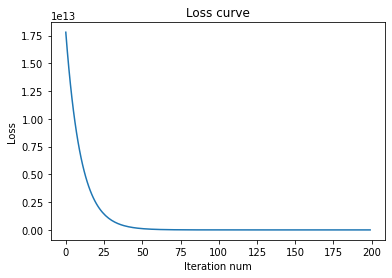

In [42]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_train)
r2_score(y_train, pred)

0.8498866338172872

In [45]:
pred2 = model.predict(X_test)
r2_score(y_test, pred2)

0.8517640632389075